In [2]:
from glob import glob
from os.path import join
import pandas as pd
import numpy as np

/Users/saraiva/PycharmProjects/LTBio/venv/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
common_path = '/Volumes/MMIS-Saraiv/Datasets/Miltiadous Dataset/features'
all_directories = glob(join(common_path, '*'))
all_directories = [directory for directory in all_directories if not directory.endswith('.csv')]

In [4]:
FEATURES_SELECTED = ['Spectral#RelativePower#C3#beta1', 'Spectral#EdgeFrequency#C3#beta3', 'Spectral#RelativePower#C3#gamma', 'Spectral#EdgeFrequency#C4#alpha1', 'Spectral#RelativePower#C4#beta3', 'Spectral#EdgeFrequency#C4#beta3', 'Spectral#EdgeFrequency#C4#gamma', 'Spectral#Flatness#Cz#theta', 'Spectral#PeakFrequency#Cz#theta', 'Spectral#EdgeFrequency#Cz#beta3', 'Spectral#EdgeFrequency#Cz#gamma', 'Spectral#PeakFrequency#Cz#gamma', 'Spectral#RelativePower#F3#beta1', 'Spectral#Diff#F4#delta', 'Spectral#RelativePower#F7#beta3', 'Spectral#EdgeFrequency#F7#beta3', 'Spectral#RelativePower#F7#gamma', 'Spectral#RelativePower#F8#beta1', 'Spectral#EdgeFrequency#F8#beta3', 'Spectral#RelativePower#Fp1#beta1', 'Spectral#EdgeFrequency#Fp1#beta3', 'Spectral#Diff#Fp2#delta', 'Spectral#RelativePower#Fp2#beta1', 'Spectral#RelativePower#Fp2#beta3', 'Spectral#Diff#Fpz#beta2', 'Spectral#Entropy#O1#delta', 'Spectral#RelativePower#O1#beta2', 'Spectral#EdgeFrequency#O1#beta2', 'Spectral#EdgeFrequency#O1#beta3', 'Spectral#RelativePower#O2#delta', 'Spectral#PeakFrequency#O2#alpha1', 'Spectral#RelativePower#O2#beta1', 'Spectral#RelativePower#O2#beta3', 'Spectral#Diff#P3#beta1', 'Spectral#RelativePower#P3#beta3', 'Spectral#RelativePower#Pz#alpha1', 'Spectral#EdgeFrequency#Pz#beta3', 'Spectral#RelativePower#T4#alpha1', 'Spectral#RelativePower#T4#beta3', 'Spectral#RelativePower#T4#gamma', 'Spectral#EdgeFrequency#T5#beta2', 'Hjorth#Complexity#T5', 'Hjorth#Complexity#P4', 'Hjorth#Complexity#F7', 'Hjorth#Complexity#T4', 'Hjorth#Complexity#F8', 'Hjorth#Complexity#T3', 'Hjorth#Mobility#P3', 'PLI#Frontal(L)-Temporal(R)#alpha1', 'PLI#Frontal(L)-Occipital(L)#alpha1', 'PLI#Frontal(R)-Temporal(R)#alpha1', 'PLI#Temporal(R)-Parietal(R)#alpha1', 'PLI#Temporal(R)-Occipital(L)#alpha1', 'PLI#Parietal(R)-Occipital(L)#alpha1', 'PLI#Occipital(L)-Occipital(R)#alpha1', 'PLI#Temporal(R)-Occipital(R)#alpha2', 'PLI#Parietal(R)-Occipital(L)#alpha2', 'COH#Frontal(L)-Frontal(R)#theta', 'COH#Frontal(L)-Occipital(L)#theta', 'COH#Frontal(L)-Occipital(R)#alpha1', 'COH#Frontal(R)-Occipital(L)#alpha1', 'COH#Parietal(R)-Occipital(L)#alpha1', 'COH#Frontal(L)-Frontal(R)#alpha2', 'COH#Frontal(L)-Occipital(R)#alpha2', 'COH#Parietal(R)-Occipital(L)#alpha2', 'COH#Parietal(R)-Occipital(R)#alpha2', 'COH#Occipital(L)-Occipital(R)#alpha2', 'COH#Frontal(L)-Occipital(L)#beta1', 'COH#Temporal(R)-Parietal(R)#beta1', 'COH#Parietal(R)-Occipital(R)#beta1', 'COH#Frontal(L)-Parietal(L)#beta2', 'COH#Frontal(R)-Occipital(L)#beta2', 'COH#Frontal(L)-Temporal(R)#beta3', 'COH#Frontal(L)-Parietal(L)#beta3', 'COH#Frontal(L)-Occipital(L)#beta3', 'COH#Frontal(L)-Occipital(R)#beta3', 'COH#Frontal(R)-Occipital(L)#beta3', 'COH#Temporal(L)-Occipital(R)#beta3', 'COH#Frontal(L)-Occipital(R)#gamma', 'COH#Frontal(R)-Occipital(R)#gamma']


In [5]:
underrepresented_targets = [4, 6, 9]

In [6]:
# Read all targets
all_targets = pd.read_csv('/Volumes/MMIS-Saraiv/Datasets/Miltiadous Dataset/participants.tsv', index_col=0, sep='\t')
# Remove "sub-" from the index and make them integers
all_targets.index = all_targets.index.str.replace('sub-', '')
all_targets.index = all_targets.index.astype(int)
all_targets

,Gender,Age,Group,MMSE
participant_id,,,,
1,F,57,A,16
2,F,78,A,22
3,M,70,A,14
4,F,67,A,20
5,M,70,A,22
...,...,...,...,...
84,F,71,F,24
85,M,64,F,26
86,M,49,F,26


In [18]:
# Read all and standardize
all_features = []
for subject_path in all_directories:
    subject = subject_path.split('/')[-1]
        
    # Get feature files
    all_files = glob(join(subject_path, '*.csv'))
    # remove all files that have "Multiple" in their name
    all_files = [file for file in all_files if 'Multiple' not in file]
    # Read them all
    all_data = [pd.read_csv(file, index_col=0) for file in all_files]
    # FIX: the spectral data has a different index
    for data in all_data:
        if 'Spectral' in data.columns[0]:
            data.index = [int(subject),]
    # Concatenate all their columns in a single DataFrame
    all_data = pd.concat(all_data, axis=1)
    # Keep only selected features
    selected_features = all_data[FEATURES_SELECTED]
    # drop nans
    selected_features = selected_features.dropna()
    
    all_features.append(selected_features)
    
all_features = pd.concat(all_features, axis=0)

# Standardize feature-wise
#all_features = (all_features - all_features.mean()) / all_features.std()
all_features

,Spectral#RelativePower#C3#beta1,Spectral#EdgeFrequency#C3#beta3,Spectral#RelativePower#C3#gamma,Spectral#EdgeFrequency#C4#alpha1,Spectral#RelativePower#C4#beta3,Spectral#EdgeFrequency#C4#beta3,Spectral#EdgeFrequency#C4#gamma,Spectral#Flatness#Cz#theta,Spectral#PeakFrequency#Cz#theta,Spectral#EdgeFrequency#Cz#beta3,...,COH#Frontal(L)-Parietal(L)#beta2,COH#Frontal(R)-Occipital(L)#beta2,COH#Frontal(L)-Temporal(R)#beta3,COH#Frontal(L)-Parietal(L)#beta3,COH#Frontal(L)-Occipital(L)#beta3,COH#Frontal(L)-Occipital(R)#beta3,COH#Frontal(R)-Occipital(L)#beta3,COH#Temporal(L)-Occipital(R)#beta3,COH#Frontal(L)-Occipital(R)#gamma,COH#Frontal(R)-Occipital(R)#gamma
1,0.039436,24.991525,0.091456,8.842161,0.115293,25.506356,35.838983,0.127452,5.276483,26.326271,...,0.307798,0.510233,0.304944,0.311908,0.557776,0.444689,0.490033,0.621373,0.442344,0.502248
2,0.069792,23.738426,0.074919,8.864583,0.106948,23.582176,35.806713,0.115434,7.165509,23.238426,...,0.333329,0.479192,0.384262,0.303056,0.517427,0.434845,0.357328,0.528313,0.377293,0.328462
3,0.026167,25.171296,0.017158,8.995370,0.034257,24.701389,35.412037,0.136475,6.432870,24.981481,...,0.222786,0.448541,0.318974,0.228924,0.426935,0.376267,0.409265,0.455983,0.359072,0.468082
4,0.022283,24.320144,0.159259,8.646583,0.044704,24.300360,37.686151,0.133291,5.951439,23.688849,...,0.171626,0.238849,0.217934,0.205100,0.271456,0.222752,0.271839,0.476216,0.230640,0.312694
5,0.081381,23.615574,0.081324,8.822131,0.071278,23.078689,36.132787,0.140083,5.980328,23.536066,...,0.366656,0.420940,0.320895,0.383389,0.457827,0.459402,0.348832,0.445901,0.503806,0.472348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.037074,23.531250,0.031172,8.848790,0.067530,23.402218,36.619960,0.115191,6.115927,23.208669,...,0.244074,0.367588,0.460919,0.253342,0.555843,0.423946,0.379787,0.428387,0.407962,0.463481
85,0.023737,23.681452,0.113275,8.760753,0.111541,24.317204,37.377688,0.129863,5.883065,23.084677,...,0.367073,0.334384,0.261974,0.379605,0.344074,0.291398,0.311660,0.572819,0.280490,0.316188
86,0.031378,25.079167,0.170297,9.270833,0.093677,24.627083,36.989583,0.116688,6.587500,24.191667,...,0.498739,0.288990,0.320795,0.541792,0.317527,0.318044,0.267583,0.543824,0.340795,0.330625
87,0.082872,24.133019,0.036247,9.058491,0.129195,23.916038,35.468868,0.128935,5.160377,24.707547,...,0.412811,0.450398,0.372567,0.427900,0.637650,0.568383,0.406463,0.337173,0.530055,0.475657


In [24]:
all_features_not_norm = all_features.copy()

In [25]:
# Standardize feature-wise
all_features = (all_features_not_norm - all_features_not_norm.mean()) / all_features_not_norm.std()

In [30]:
# Normalize feature-wise
all_features = (all_features_not_norm - all_features_not_norm.min()) / (all_features_not_norm.max() - all_features_not_norm.min())

In [31]:
# Keep only sessions that have MMSE in 'underrepresented_targets'
single_examples = all_features.loc[all_targets[all_targets['MMSE'].isin(underrepresented_targets)].index]
single_examples

,Spectral#RelativePower#C3#beta1,Spectral#EdgeFrequency#C3#beta3,Spectral#RelativePower#C3#gamma,Spectral#EdgeFrequency#C4#alpha1,Spectral#RelativePower#C4#beta3,Spectral#EdgeFrequency#C4#beta3,Spectral#EdgeFrequency#C4#gamma,Spectral#Flatness#Cz#theta,Spectral#PeakFrequency#Cz#theta,Spectral#EdgeFrequency#Cz#beta3,...,COH#Frontal(L)-Parietal(L)#beta2,COH#Frontal(R)-Occipital(L)#beta2,COH#Frontal(L)-Temporal(R)#beta3,COH#Frontal(L)-Parietal(L)#beta3,COH#Frontal(L)-Occipital(L)#beta3,COH#Frontal(L)-Occipital(R)#beta3,COH#Frontal(R)-Occipital(L)#beta3,COH#Temporal(L)-Occipital(R)#beta3,COH#Frontal(L)-Occipital(R)#gamma,COH#Frontal(R)-Occipital(R)#gamma
participant_id,,,,,,,,,,,,,,,,,,,,,
17,0.043513,0.434345,0.051568,0.280283,0.125994,0.337991,0.860948,0.944093,0.195056,0.515274,...,0.447107,0.449446,0.434580,0.387003,0.493219,0.330595,0.376687,0.320716,0.270593,0.478154
20,0.144063,0.682639,0.348764,0.348684,0.232213,0.573318,0.650052,0.934607,0.173550,0.683214,...,0.324813,0.598432,0.388016,0.181838,0.510146,0.460087,0.572747,0.456104,0.507135,0.486318
36,1.000000,0.252212,0.037672,0.711605,0.242238,0.169330,0.080922,0.919492,0.559064,0.674541,...,0.487009,0.583036,0.473184,0.355411,0.802832,0.680564,0.633044,0.523104,0.674923,0.478788


In [33]:
from scipy.stats import kruskal, mannwhitneyu, wilcoxon, ttest_ind
measure = wilcoxon
# Compute statistical test between each single example and the rest of the examples
for i, (index, example) in enumerate(single_examples.iterrows()):
    print(f"Example of target {all_targets.loc[index]['MMSE']}")
    avg_stat_same, avg_stat_diff = [], []
    avg_p_same, avg_p_diff = [], []
    n_same, n_diff = 0, 0
    for j, (index2, example2) in enumerate(all_features.iterrows()):
        if index == index2:
            continue
        #u_stat, p = mannwhitneyu(example, example2)
        # Kruskal-Wallis H-test
        stat, p = measure(example, example2)
        statement = f"With example of target {all_targets.loc[index2]['MMSE']}: "
        if p > 0.05:
            avg_stat_same.append(stat)
            avg_p_same.append(p)
            n_same += 1
        else:
            n_diff += 1
            avg_stat_diff.append(stat)
            avg_p_diff.append(p)
        #print(statement + f"they come from the same subject (p={p:.3f})." if p > 0.05 else statement + f"they come from different subjects (p={p:.3f}).")
    print(f"Same: {n_same}, Different: {n_diff}")
    print(f"Average statistic same: {np.mean(avg_stat_same):.3f}, Average p same: {np.mean(avg_p_same):.3f}")
    print(f"Average statistic diff: {np.mean(avg_stat_diff):.3f}, Average p diff: {np.mean(avg_p_diff):.3f}")
    print("-------")

Example of target 6
Same: 53, Different: 34
Average statistic same: 1443.113, Average p same: 0.461
Average statistic diff: 1023.794, Average p diff: 0.014
-------
Example of target 4
Same: 47, Different: 40
Average statistic same: 1424.213, Average p same: 0.431
Average statistic diff: 945.200, Average p diff: 0.009
-------
Example of target 9
Same: 71, Different: 16
Average statistic same: 1424.859, Average p same: 0.411
Average statistic diff: 1098.938, Average p diff: 0.019
-------


In [37]:
measure = mannwhitneyu
# Compute statistical test between example with itself and others, considering only 26 <= MMSE <= 30
healthy_examples = all_features.loc[all_targets[all_targets['MMSE'] >= 30].index]
for i, (index, example) in enumerate(healthy_examples.iterrows()):
    print(f"Example of target {all_targets.loc[index]['MMSE']}")
    avg_stat_same, avg_stat_diff = [], []
    avg_p_same, avg_p_diff = [], []
    n_same, n_diff = 0, 0
    for j, (index2, example2) in enumerate(all_features.iterrows()):
        if index == index2:
            print("With itself:")
            stat, p = measure(example, example2)
            print(f"Statistic: {stat:.3f}, p: {p:.3f}")
        else:
            stat, p = measure(example, example2)
            statement = f"With example of target {all_targets.loc[index2]['MMSE']}: "
            if p > 0.05:
                avg_stat_same.append(stat) 
                avg_p_same.append(p)
                n_same += 1
            else:
                n_diff += 1
                avg_stat_diff.append(stat)
                avg_p_diff.append(p)
    print(f"Same: {n_same}, Different: {n_diff}")
    print(f"Average statistic same: {np.mean(avg_stat_same):.3f}, Average p same: {np.mean(avg_p_same):.3f}")
    print(f"Average statistic diff: {np.mean(avg_stat_diff):.3f}, Average p diff: {np.mean(avg_p_diff):.3f}")
    print("-------")

Example of target 30
With itself:
Statistic: 3200.000, p: 1.000
Same: 43, Different: 44
Average statistic same: 2901.267, Average p same: 0.325
Average statistic diff: 2388.466, Average p diff: 0.014
-------
Example of target 30
With itself:
Statistic: 3200.000, p: 1.000
Same: 49, Different: 38
Average statistic same: 3470.633, Average p same: 0.411
Average statistic diff: 3990.632, Average p diff: 0.016
-------
Example of target 30
With itself:
Statistic: 3200.000, p: 1.000
Same: 76, Different: 11
Average statistic same: 3141.605, Average p same: 0.472
Average statistic diff: 2891.636, Average p diff: 0.023
-------
Example of target 30
With itself:
Statistic: 3200.000, p: 1.000
Same: 76, Different: 11
Average statistic same: 3196.539, Average p same: 0.449
Average statistic diff: 3163.091, Average p diff: 0.021
-------
Example of target 30
With itself:
Statistic: 3200.000, p: 1.000
Same: 29, Different: 58
Average statistic same: 3567.638, Average p same: 0.252
Average statistic diff: 

In [36]:
from scipy.stats import mannwhitneyu


# Data augmentation by iteratively interpolating examples with targets in between 4 and 6 (exclusive) and 6 and 9 (exclusive)
# (4, 6) -> 5; then (4, 6) -> 4.5 and (5, 6) -> 5.5; and so on exponentially, until the distance between the targets is equal or less than 0.1
# (6, 9) -> 7.5; then (6, 9) -> 8.25 and (7.5, 9) -> 8.75; and so on exponentially, until the distance between the targets is equal or less than 0.1
def exponentially_generate_synthetic_examples(a, target_a, b, target_b, min_difference):
    # Generate the middle target
    middle_target = (target_a + target_b) / 2
    # Generate the middle example by interpolating the feature vectors
    middle_example = (a + b) / 2
    # Apply gaussian noise to the middle example
    #middle_example += np.random.normal(0, 0.15, middle_example.shape)
    # Add the middle example to the list
    synthetic_examples = [(middle_example, middle_target)]

    # If the difference between the targets is less than the minimum difference, return the synthetic examples
    if abs(target_a - target_b) <= min_difference:
        return synthetic_examples
    
    # Otherwise, recursively generate the synthetic examples
    synthetic_examples += exponentially_generate_synthetic_examples(a, target_a, middle_example, middle_target, min_difference)
    synthetic_examples += exponentially_generate_synthetic_examples(middle_example, middle_target, b, target_b, min_difference)
    return synthetic_examples




With original examples of targets 6 and 4: they come from different subjects (p=0.002).
-------
Synthetic example of target 5.0
With parent example of target 6: they come from the same subject (p=0.053).
With parent example of target 4: they come from the same subject (p=0.173).
-------
Synthetic example of target 5.5
With parent example of target 6: they come from the same subject (p=0.271).
With parent example of target 4: they come from different subjects (p=0.021).
-------
Synthetic example of target 5.75
With parent example of target 6: they come from the same subject (p=0.558).
With parent example of target 4: they come from different subjects (p=0.006).
-------
Synthetic example of target 5.25
With parent example of target 6: they come from the same subject (p=0.119).
With parent example of target 4: they come from the same subject (p=0.064).
-------
Synthetic example of target 4.5
With parent example of target 6: they come from different subjects (p=0.007).
With parent example 

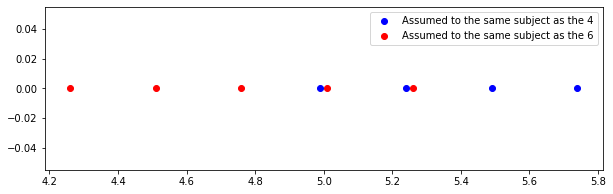

In [37]:
a, b = single_examples.loc[single_examples.index[0]], single_examples.loc[single_examples.index[1]]
target_a, target_b = all_targets.loc[single_examples.index[0]]['MMSE'], all_targets.loc[single_examples.index[1]]['MMSE']

synthetic = exponentially_generate_synthetic_examples(a, target_a, b, target_b, min_difference=0.5)

# compute the statistical test between the two original examples
u_stat_ref, p_ref = mannwhitneyu(a, b)
statement = f"With original examples of targets {target_a} and {target_b}: "
print(statement + f"they come from the same subject (p={p_ref:.3f})." if p_ref > 0.05 else statement + f"they come from different subjects (p={p_ref:.3f}).")
print("-------")

# compute the statistical test between every synthetic example and the original examples
res = {}
for example in synthetic:
    vector, target = example
    print("Synthetic example of target", target)
    u_stat_a, p_a = mannwhitneyu(a, example[0])
    u_stat_b, p_b = mannwhitneyu(b, example[0])
    statement = f"With parent example of target {target_a}: "
    print(statement + f"they come from the same subject (p={p_a:.3f})." if p_a > 0.05 else statement + f"they come from different subjects (p={p_a:.3f}).")
    statement = f"With parent example of target {target_b}: "
    print(statement + f"they come from the same subject (p={p_b:.3f})." if p_b > 0.05 else statement + f"they come from different subjects (p={p_b:.3f}).")
    print("-------")
    res[target] = (p_a>0.05, p_b>0.05)

# Draw a plot illustrating the tendency of the synthetic examples to be closer to the target, using res
# | ------------------------------------------------------- |
# |    <-    |    <-   |    <-  ->    |    ->    |    ->    |   
# | ------------------------------------------------------- |
#     4.25      4.5      4.75    5.0      5.25     5.5

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))
close_to_left = [target for target, (left, right) in res.items() if left]
close_to_right = [target for target, (left, right) in res.items() if right]
plt.scatter([x - 0.01 for x in close_to_left], [0] * len(close_to_left), label='Assumed to the same subject as the 4',
            color='blue')
plt.scatter([x + 0.01 for x in close_to_right], [0] * len(close_to_right), label='Assumed to the same subject as the 6',
            color='red')
plt.legend()
plt.show()

With original examples of targets 6 and 9: they come from the same subject (p=0.789).
-------
Synthetic example of target 7.5
With parent example of target 6: they come from the same subject (p=0.180).
With parent example of target 9: they come from the same subject (p=0.509).
-------
Synthetic example of target 6.75
With parent example of target 6: they come from the same subject (p=0.279).
With parent example of target 9: they come from the same subject (p=0.627).
-------
Synthetic example of target 6.375
With parent example of target 6: they come from the same subject (p=0.556).
With parent example of target 9: they come from the same subject (p=0.852).
-------
Synthetic example of target 6.1875
With parent example of target 6: they come from the same subject (p=0.786).
With parent example of target 9: they come from the same subject (p=1.000).
-------
Synthetic example of target 6.5625
With parent example of target 6: they come from the same subject (p=0.391).
With parent example o

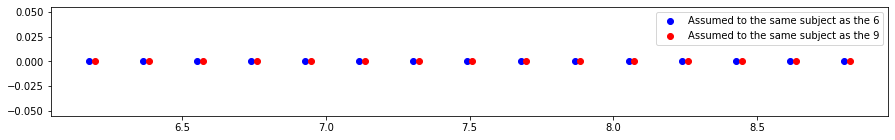

In [41]:
a, b = single_examples.loc[single_examples.index[0]], single_examples.loc[single_examples.index[2]]
target_a, target_b = all_targets.loc[single_examples.index[0]]['MMSE'], all_targets.loc[single_examples.index[2]]['MMSE']

synthetic = exponentially_generate_synthetic_examples(a, target_a, b, target_b, min_difference=0.5)

# compute the statistical test between the two original examples
u_stat_ref, p_ref = mannwhitneyu(a, b)
statement = f"With original examples of targets {target_a} and {target_b}: "
print(statement + f"they come from the same subject (p={p_ref:.3f})." if p_ref > 0.05 else statement + f"they come from different subjects (p={p_ref:.3f}).")
print("-------")

# compute the statistical test between every synthetic example and the original examples
res = {}
for example in synthetic:
    vector, target = example
    print("Synthetic example of target", target)
    u_stat_a, p_a = mannwhitneyu(a, example[0])
    u_stat_b, p_b = mannwhitneyu(b, example[0])
    statement = f"With parent example of target {target_a}: "
    print(statement + f"they come from the same subject (p={p_a:.3f})." if p_a > 0.05 else statement + f"they come from different subjects (p={p_a:.3f}).")
    statement = f"With parent example of target {target_b}: "
    print(statement + f"they come from the same subject (p={p_b:.3f})." if p_b > 0.05 else statement + f"they come from different subjects (p={p_b:.3f}).")
    print("-------")
    res[target] = (p_a>0.05, p_b>0.05)

# Draw a plot illustrating the tendency of the synthetic examples to be closer to the target, using res
# | ------------------------------------------------------- |
# |    <-    |    <-   |    <-  ->    |    ->    |    ->    |   
# | ------------------------------------------------------- |
#     4.25      4.5      4.75    5.0      5.25     5.5

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 2))
close_to_left = [target for target, (left, right) in res.items() if left]
close_to_right = [target for target, (left, right) in res.items() if right]
plt.scatter([x - 0.01 for x in close_to_left], [0] * len(close_to_left), label='Assumed to the same subject as the 6',
            color='blue')
plt.scatter([x + 0.01 for x in close_to_right], [0] * len(close_to_right), label='Assumed to the same subject as the 9',
            color='red')
plt.legend()
plt.show()